In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

def derivative(y,x,w, i):    
    ret = -y * x[i] * sigmoid(-y * np.dot(x, w))
    return ret

class GradDescenter:
    
    def __init__(self, x, y, w, dimx):
        self.x = np.array(x)
        self.y = np.array(y)
        self.w = np.array(w)
        self.n = 0
        self.order = len(y)
        self.dimx = dimx
    
       
    def step(self, n):
        next_w = self.w -  1/np.sqrt(n + 1) * self.grad()
        eps = np.linalg.norm(next_w - self.w)   
        self.w = next_w
        return eps
    
    def grad(self):        
        return np.array([self.deriv(i) for i in range(0, self.dimx)])
        
    
    def deriv(self, i):        
        terms = [derivative(self.y[k], self.x[k], self.w, i) for k in range(0, self.order)]                
        res = np.sum(terms)
        return res
    
    def findmin(self, eps):
        err = np.inf
        n = 0
        while err > eps:
            err = self.step(n)
            n = n + 1
        return n
    

In [5]:
from numpy import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
def genDividible2d(begin, end, bias, size):

    xs = rnd.uniform(begin, end, size)   
        
    k = rnd.uniform(0, 1)
    
    bias = rnd.uniform(-bias, bias, size)    
    
    y = xs * k
    biased = y + bias
    y_1 = []
    y_2 = [] 
    
    x_1 = []
    x_2 = []
    for i in range(0, size):
        if y[i] > biased[i]:
            y_1.append(biased[i])
            x_1.append(xs[i])
        else:
            y_2.append(biased[i])
            x_2.append(xs[i])        
    negones_1 = [-1 for x in x_1]
    negones_2 = [-1 for x in x_2]
    return np.stack((negones_1, x_1, y_1),axis=-1), np.stack((negones_2, x_2, y_2),axis=-1)

def genUndividable2d(begin, end, size):
    xs = rnd.uniform(begin, end, size)
    
    k = rnd.uniform(begin, end)    
    bias = rnd.uniform(-k * xs[-1], k * xs[-1], size)    
    
    y_1 = xs * k + bias
    y_2 = xs * k - bias
    negones = [-1 for xs in xs]
    return np.stack((negones, xs, y_1), axis=-1), np.stack((negones, xs, y_2),axis=-1)

def lin(w):
    def linw(x):
        return -x*w[1]/w[2] + w[0]/w[2]
    return linw 

    

<IPython.core.display.Javascript object>


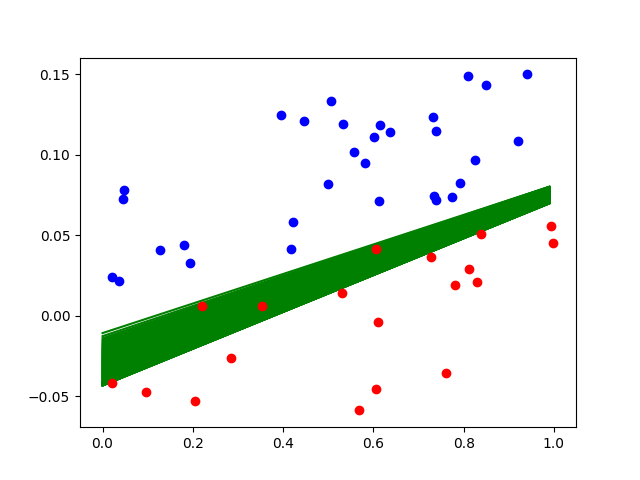

<IPython.core.display.Javascript object>


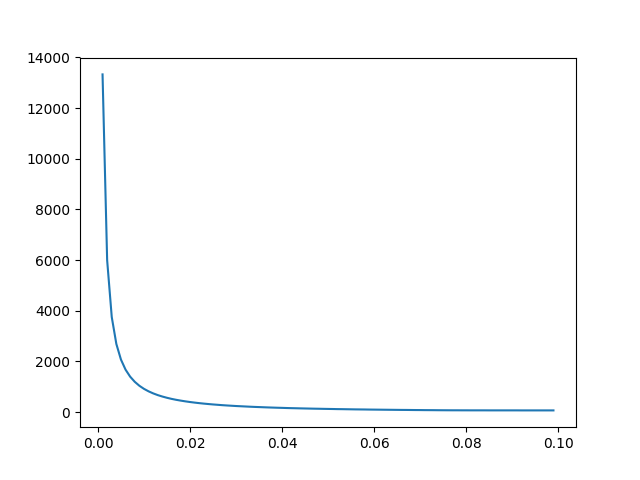

In [6]:
x1, x2 = genDividible2d(0, 1,0.1, 50)

y1 = [-1 for x in x1]
y2 = [1 for x in x2]

y = np.concatenate((y1, y2))
x = np.concatenate((x1, x2))
w =  [0, 1, 2]
ns = []
plt.figure(1)
for i in np.arange(0.001, 0.1, 0.001):
    gd = GradDescenter(x, y, w, 3)
    ns.append([i, gd.findmin(i)])        
    xs = np.arange(0, 1, 0.01)
    linw = lin(gd.w)
    plt.plot(xs,[linw(x) for x in xs], 'g')    


    
plt.plot(x1[:, 1], x1[:, 2], 'ro')
plt.plot(x2[:, 1], x2[:, 2], 'bo')

ns = np.array(ns)    
plt.figure(2)
plt.plot(ns[:,0],ns[:,1])
plt.show()